***Import Library***

In [192]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('talk')
sns.set_style('darkgrid')

***Load Data***


In [193]:
car_ford = pd.read_csv('ford.csv')

display(car_ford.head())

car_ford.isnull().count #Check missing values
print(car_ford.columns)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,48.7,1.0


Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'mpg',
       'engineSize'],
      dtype='object')


In [194]:
#Unique value of fueltype
print(car_ford['fuelType'].unique())

['Petrol' 'Diesel' 'Hybrid' 'Electric' 'Other']


In [195]:
#Filtering
car_ford_1= car_ford[car_ford['fuelType'] == 'Hybrid']
display(car_ford_1)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
322,Mondeo,2019,22998,Automatic,7337,Hybrid,47.1,2.0
3925,Mondeo,2017,18290,Automatic,9641,Hybrid,56.5,2.0
4410,Mondeo,2017,17080,Automatic,27498,Hybrid,56.5,2.0
4807,Mondeo,2016,12995,Automatic,42165,Hybrid,67.3,2.0
5790,Mondeo,2019,22500,Automatic,7058,Hybrid,47.1,2.0
6153,Kuga,2020,31000,Semi-Auto,10,Hybrid,201.8,2.5
6536,Kuga,2020,31991,Semi-Auto,2357,Hybrid,201.8,2.5
9220,Kuga,2020,32000,Automatic,10,Hybrid,201.8,2.5
10536,Mondeo,2020,24979,Automatic,2213,Hybrid,47.9,2.0
10991,Mondeo,2019,22899,Automatic,4665,Hybrid,47.1,2.0


***Barplot: Percentage of cars, Average and Total selling price of cars by fuelType,model and transmission.*** 

***Aggragating based on fueltype***

In [196]:
aggregate_df = car_ford.groupby('fuelType')['price'].agg(['count','sum','mean'])
display(aggregate_df)

,count,sum,mean
fuelType,,,
Diesel,5762,78704159,13659.173724
Electric,2,31475,15737.500000
Hybrid,22,487280,22149.090909
Other,1,13800,13800.000000
Petrol,12177,141362615,11608.985382


***Data Preprocessing***

In [197]:
aggregate_df = aggregate_df.sort_values(by= 'count', ascending = False)

# Creating Perecntage of fueltype column

aggregate_df['Percentage_of_fueltype'] = (aggregate_df['count']/aggregate_df['count'].sum())*100

aggregate_df['sum'] = aggregate_df['sum']/1000000

#Dropping count column
aggregate_df = aggregate_df.drop('count' ,axis = 1)

#Rounding after decimal
aggregate_df = aggregate_df.round(2)

display(aggregate_df.head())

,sum,mean,Percentage_of_fueltype
fuelType,,,
Petrol,141.36,11608.99,67.79
Diesel,78.70,13659.17,32.08
Hybrid,0.49,22149.09,0.12
Electric,0.03,15737.50,0.01
Other,0.01,13800.00,0.01


***Data Visualization***

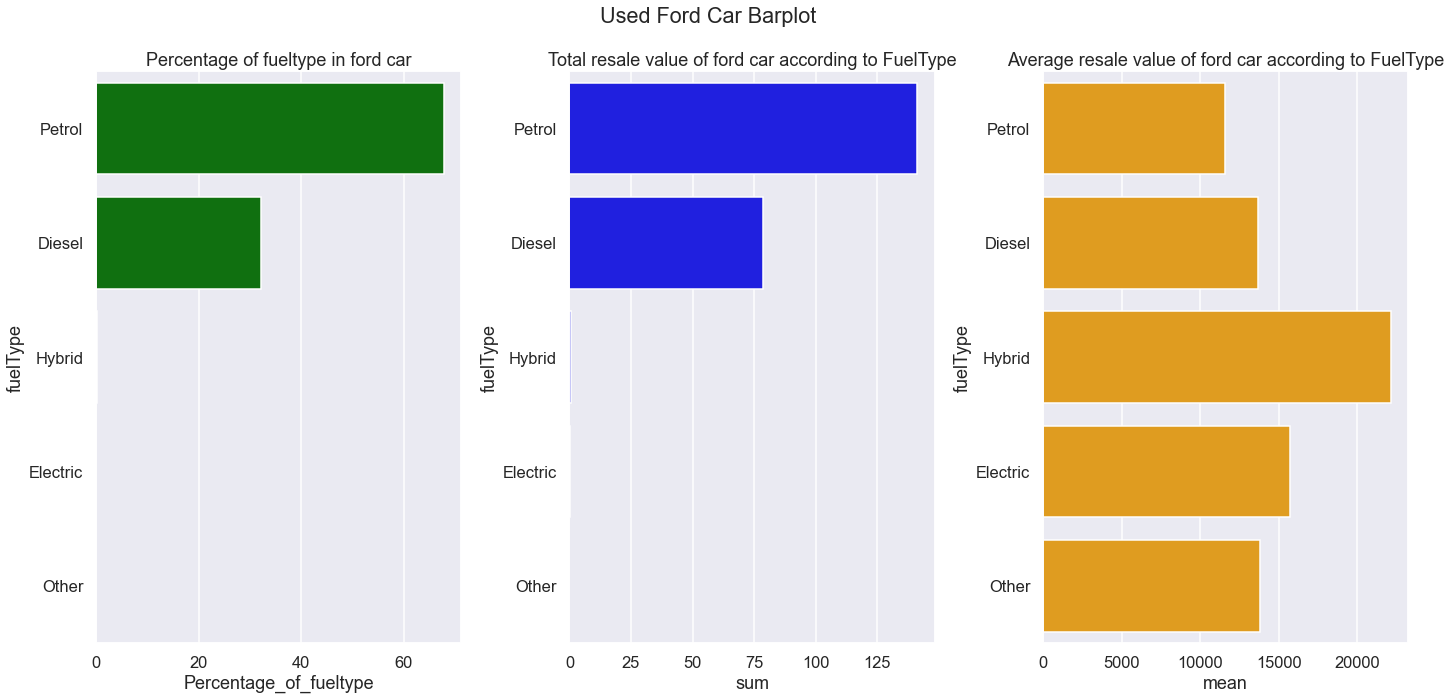

In [198]:
plt.figure(figsize = (20,10))

plt.subplot(1,3,1)
sns.barplot(x='Percentage_of_fueltype',y=aggregate_df.index, data = aggregate_df,orient = 'h' , color = 'green')
plt.title('Percentage of fueltype in ford car')


plt.subplot(1,3,2)
sns.barplot(x='sum',y=aggregate_df.index, data = aggregate_df,orient = 'h' , color = 'blue')
plt.title('Total resale value of ford car according to FuelType')

plt.subplot(1,3,3)
sns.barplot(x='mean',y=aggregate_df.index, data = aggregate_df,orient = 'h' , color = 'Orange')
plt.title('Average resale value of ford car according to FuelType')

plt.suptitle('Used Ford Car Barplot')
plt.tight_layout()
plt.show()

***Aggreagating based on Model***

In [199]:
aggregate_df_model = car_ford.groupby('model')['price'].agg(['count','sum','mean'])
display(aggregate_df_model)

,count,sum,mean
model,,,
B-MAX,355,2942072,8287.526761
C-MAX,543,5383610,9914.567219
EcoSport,1143,14286664,12499.268591
Edge,208,4744584,22810.500000
Escort,1,3000,3000.000000
Fiesta,6556,66850631,10196.862569
Focus,4588,60496831,13185.882956
Fusion,16,40893,2555.812500
Galaxy,228,4067947,17841.872807


***Data Preprocessing***

In [200]:
#Sorting Values
aggregate_df_model = aggregate_df_model.sort_values(by= 'count', ascending = False)

# Creating Perecntage of model column 
aggregate_df_model['Percentage_of_model'] = (aggregate_df_model['count']/aggregate_df_model['count'].sum())*100

#Converting Sum
aggregate_df_model['sum'] = aggregate_df_model['sum']/1000000

#Dropping Column
aggregate_df_model = aggregate_df_model.drop('count' ,axis = 1)

#Rounding value after decimal
aggregate_df_model = aggregate_df_model.round(2)

display(aggregate_df_model.head())

,sum,mean,Percentage_of_model
model,,,
Fiesta,66.85,10196.86,36.50
Focus,60.50,13185.88,25.54
Kuga,35.21,15823.47,12.39
EcoSport,14.29,12499.27,6.36
C-MAX,5.38,9914.57,3.02


***Data Visualization***

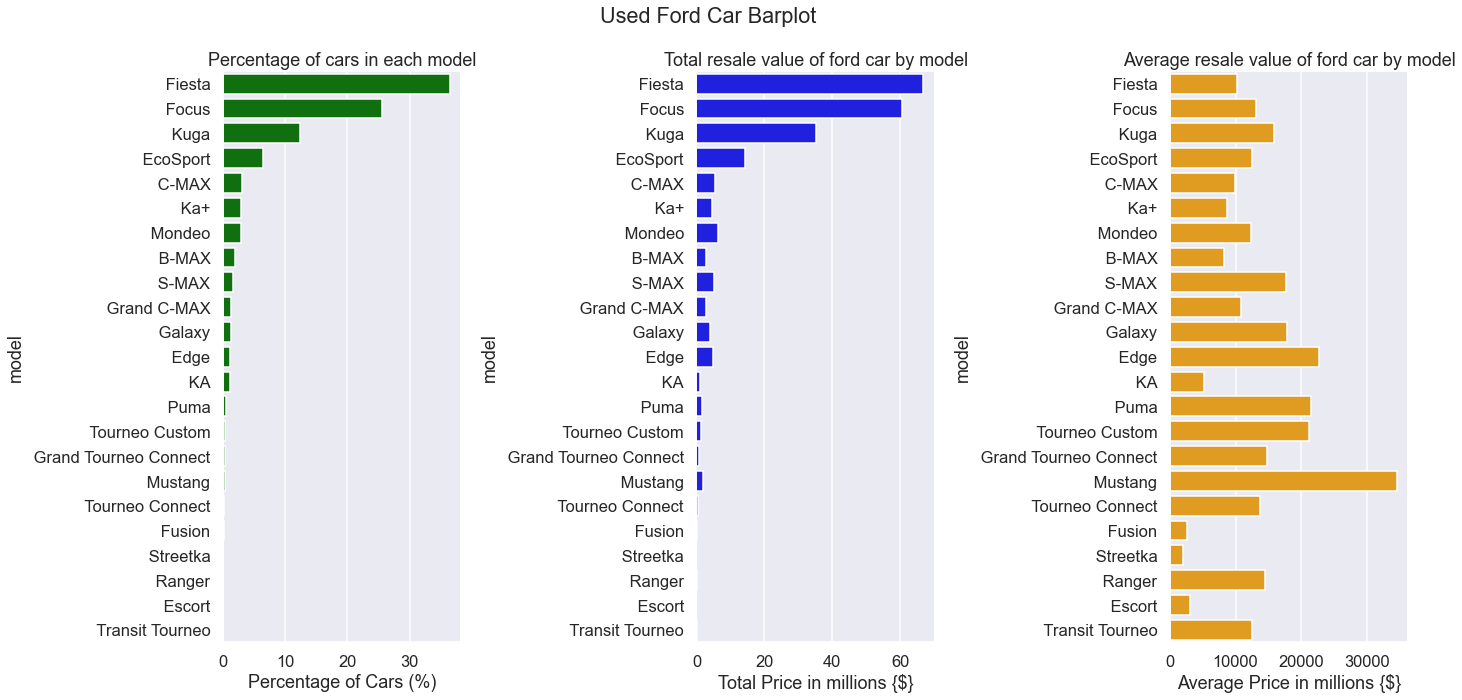

In [201]:
plt.figure(figsize = (20,10))

plt.subplot(1,3,1)
sns.barplot(x='Percentage_of_model',y=aggregate_df_model.index, data = aggregate_df_model,orient = 'h' , color = 'green')
plt.title('Percentage of cars in each model')
plt.xlabel('Percentage of Cars (%)')

plt.subplot(1,3,2)
sns.barplot(x='sum',y=aggregate_df_model.index, data = aggregate_df_model,orient = 'h' , color = 'blue')
plt.title('Total resale value of ford car by model')
plt.xlabel('Total Price in millions {$}')

plt.subplot(1,3,3)
sns.barplot(x='mean',y=aggregate_df_model.index, data = aggregate_df_model,orient = 'h' , color = 'Orange')
plt.title('Average resale value of ford car by model')
plt.xlabel('Average Price in millions {$}')

plt.suptitle('Used Ford Car Barplot')
plt.tight_layout()
plt.show()

***Aggreagating based on Transmission***

In [202]:
aggregate_df_transmission = car_ford.groupby('transmission')['price'].agg(['count','sum','mean'])
display(aggregate_df_transmission)

,count,sum,mean
transmission,,,
Automatic,1360,21398271,15734.022794
Manual,15517,182984068,11792.490043
Semi-Auto,1087,16216990,14919.034039


***Data Preprocessing***

In [203]:
#Sorting Values
aggregate_df_transmission = aggregate_df_transmission.sort_values(by= 'count', ascending = False)

# Creating Perecntage of model column 
aggregate_df_transmission['Percentage_of_transmission'] = (aggregate_df_transmission['count']/aggregate_df_transmission['count'].sum())*100

#Converting Sum
aggregate_df_transmission['sum'] = aggregate_df_transmission['sum']/1000000

#Dropping Column
aggregate_df_transmission = aggregate_df_transmission.drop('count' ,axis = 1)

#Rounding value after decimal
aggregate_df_transmission = aggregate_df_transmission.round(2)

display(aggregate_df_transmission.head())

,sum,mean,Percentage_of_transmission
transmission,,,
Manual,182.98,11792.49,86.38
Automatic,21.40,15734.02,7.57
Semi-Auto,16.22,14919.03,6.05


***Data Visualization***

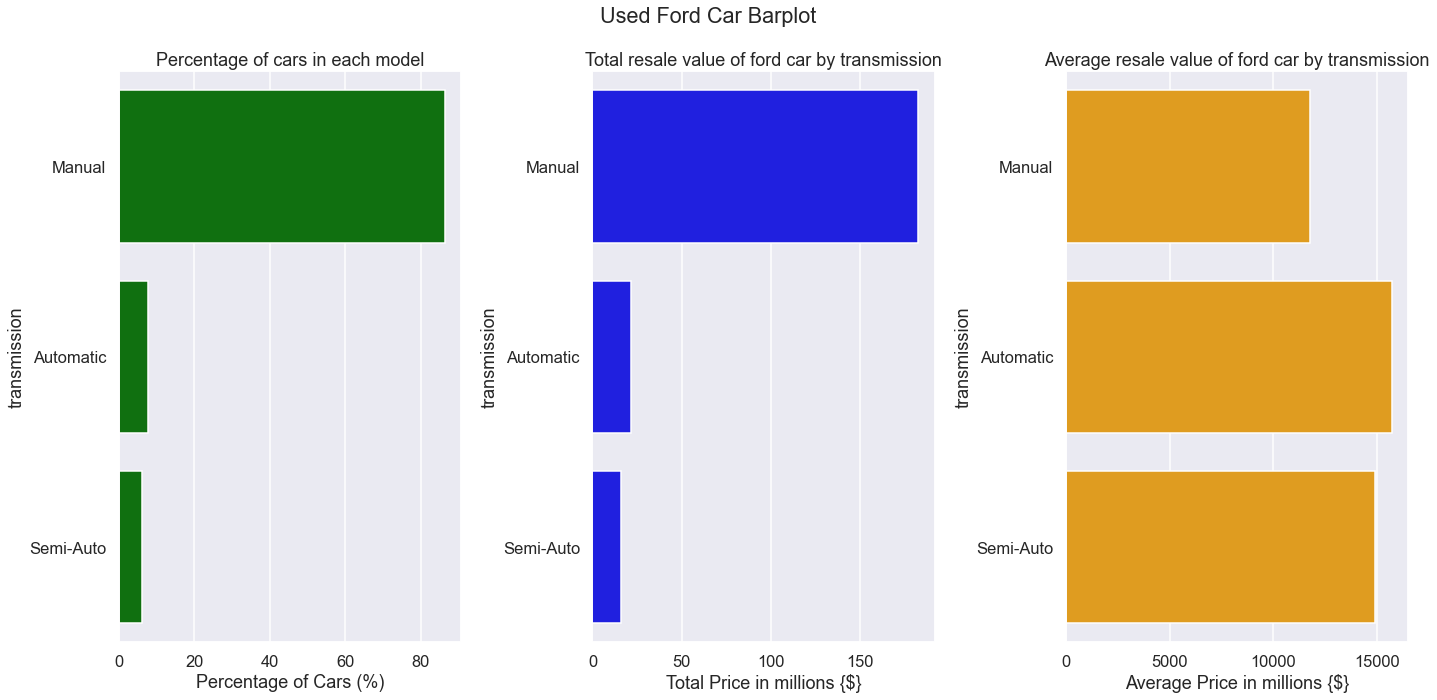

In [209]:
plt.figure(figsize = (20,10))

plt.subplot(1,3,1)
sns.barplot(x='Percentage_of_transmission',y=aggregate_df_transmission.index, data = aggregate_df_transmission,orient = 'h' , color = 'green')
plt.title('Percentage of cars in each model')
plt.xlabel('Percentage of Cars (%)')

plt.subplot(1,3,2)
sns.barplot(x='sum',y=aggregate_df_transmission.index, data = aggregate_df_transmission,orient = 'h' , color = 'blue')
plt.title('Total resale value of ford car by transmission')
plt.xlabel('Total Price in millions {$}')

plt.subplot(1,3,3)
sns.barplot(x='mean',y=aggregate_df_transmission.index, data = aggregate_df_transmission,orient = 'h' , color = 'Orange')
plt.title('Average resale value of ford car by transmission')
plt.xlabel('Average Price in millions {$}')

plt.suptitle('Used Ford Car Barplot')
plt.tight_layout()
plt.show()